In [1]:
import csv
import os
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np
# %matplotlib notebook

In [57]:
csvdata = 'Food_Access_USDA.csv'
df = pd.read_csv(csvdata)
df.shape

(948, 46)

In [108]:
# Low income vs non low income
low_income_df = df[{"GEOID10","NAME10","PLNG_REGION","Urban","LowIncomeTracts","lalowihalf","lalowihalfshare","lalowi1","lalowi1share","GlobalID","lapop1","POP2010","lakids1","laseniors1"}]
low_income_df=low_income_df.rename(columns={"PLNG_REGION": "Metro_Atlanta", 
                                            "GlobalID": "Global_ID",
                                            "LowIncomeTracts": "Income_Level", 
                                            "lalowihalf": "LowAcces_LowIncome.5miles", 
                                            "lalowi1share": "LowAccess_LowIncome1mile%", 
                                            "lalowihalfshare": "LowAccess_LowIncome.5miles%", 
                                            "lalowi1": "LowAccess_LowIncome1mile", 
                                            "GEOID10": "Geo_ID", 
                                            "NAME10": "Name",
                                            "lakids1": "LowAccess_Kids1Mile",
                                            "laseniors1":"LowAccess_Seniors1Mile",
                                            "lapop1":"LowAccess_1Mile",
                                            "POP2010": "Total_Pop"})
# Drop stuff from dataframe
# This drops all 0 values from "Urban"
low_income_df = low_income_df.loc[(low_income_df["Urban"] != 0) & (low_income_df["Metro_Atlanta"] == "ARC 10")]
low_income_df
# Change values in dataframe
# for col in low_income_df.columns():
low_income_df.loc[low_income_df["Income_Level"] == 0, "Income_Level"] = "Not Low Income"
low_income_df.loc[low_income_df["Income_Level"] == 1, "Income_Level"] = "Low Income" 

# low_income_df.Income_Level = low_income_df.Income_Level.map({ 0 : "Not Low Income", 1 : "Low Income"})

# low_income_df.replace({'Income_Level':{0:"Not Low Income",1:"Low Income"}},inplace=True)
low_income_df
df_high=low_income_df[(low_income_df["Income_Level"] == "Low Income")]
df_low=low_income_df[(low_income_df["Income_Level"] == "Not Low Income")]

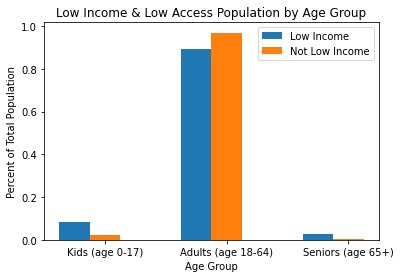

Total Population: 3907025
Kids_Low: 8.217536207287386%
Kids_High: 2.4498587026794043%
Adults_Low: 89.12166198965427%
Adults_High: 96.96344805562799%
Seniors_Low: 2.6608018030583374%
Seniors_High: 0.5866932416925923%


In [134]:
barWidth = 0.25
# total_pop=df_low["LowAccess_LowIncome1mile"].sum()
total_pop=low_income_df['Total_Pop'].sum()
kids_pop=df_low["LowAccess_Kids1Mile"].sum()/total_pop
kids_pop2=df_high["LowAccess_Kids1Mile"].sum()/total_pop
seniors_pop=df_low["LowAccess_Seniors1Mile"].sum()/total_pop
seniors_pop2=df_high["LowAccess_Seniors1Mile"].sum()/total_pop
adult_pop=1-kids_pop-seniors_pop
adult_pop2=1-kids_pop2-seniors_pop2

y1=[kids_pop,adult_pop,seniors_pop]
y2=[kids_pop2,adult_pop2,seniors_pop2]
# y=[kids_pop,adult_pop, seniors_pop]

xpos1 = np.arange(len(y1))
xpos2 = [x + barWidth for x in xpos1]

plt.bar(xpos1,y1, width=barWidth, label = "Low Income")
plt.bar(xpos2,y2, width=barWidth, label = "Not Low Income")
xgroups=["Kids (age 0-17)","Adults (age 18-64)","Seniors (age 65+)"]

plt.title("Low Income & Low Access Population by Age Group")
plt.xlabel("Age Group")
plt.xticks([r + barWidth for r in range(len(y1))], xgroups)
plt.ylabel("Percent of Total Population")
plt.legend()
plt.show()
print(f"Total Population: {total_pop}")
print(f"Kids_Low: {kids_pop*100}%")
print(f"Kids_High: {kids_pop2*100}%")
print(f"Adults_Low: {adult_pop*100}%")
print(f"Adults_High: {adult_pop2*100}%")
print(f"Seniors_Low: {seniors_pop*100}%")
print(f"Seniors_High: {seniors_pop2*100}%")

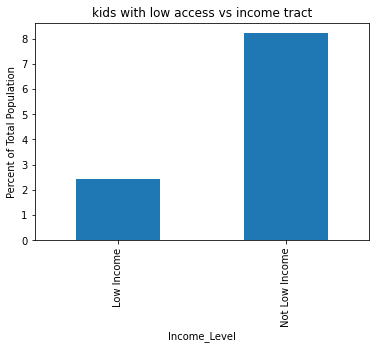

Income_Level
Low Income        2.449859
Not Low Income    8.217536
Name: LowAccess_Kids1Mile, dtype: float64


In [133]:
income_groups=low_income_df.groupby("Income_Level")
lowincome_sum=income_groups['Total_Pop'].sum()
kids_sum=(income_groups['LowAccess_Kids1Mile'].sum()/total_pop)*100
kids_sum.plot(kind='bar', ylabel="Percent of Total Population", title="kids with low access vs income tract")
plt.show()
print(kids_sum)